In [1]:
import cv2
import numpy as np

def find_red_regions(original_image):
    # Convert the image from BGR to RGB
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Define the lower and upper bounds for red color in RGB
    lower_red = np.array([150, 0, 0], dtype=np.uint8)
    upper_red = np.array([255, 100, 100], dtype=np.uint8)

    # Create a binary mask based on the red color range
    red_mask = cv2.inRange(rgb_image, lower_red, upper_red)

    # Find contours in the red mask
    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the red regions on the original image
    red_regions = [cv2.boundingRect(contour) for contour in contours]

    return red_regions

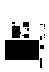

In [2]:
from IPython.display import display, Image

def find_inverted_red_mask(original_image):
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    # Create a mask to represent the red regions
    red_mask = np.zeros_like(grayscale_image)
    # Assuming you have the red regions coordinates, you can set the corresponding pixels to 255
    # Example: red_regions = [(x1, y1, width1, height1), (x2, y2, width2, height2), ...]
    red_regions = find_red_regions(original_image)  # Replace with actual red regions
    for x, y, width, height in red_regions:
        red_mask[y:y+height, x:x+width] = 255
    # Invert the red mask so that red regions are represented by 0
    inverted_red_mask = cv2.bitwise_not(red_mask)
    return inverted_red_mask


def display_image(image):
    _, buffer = cv2.imencode('.png', image)
    img_str = buffer.tobytes()
    display(Image(data=img_str))


# Example usage:
image_path = '/Users/szaday2/Downloads/masked.png'
original_image = cv2.imread(image_path)
half = cv2.resize(original_image, (0, 0), fx = 0.1, fy = 0.1)
image = find_inverted_red_mask(half)
display_image(image)

In [7]:
# from: https://stackoverflow.com/a/64899570/

def maxRectangle(mask):
    best = {'area': 0}
    width = mask.shape[1]
    depth = [0] * width

    for y in range(mask.shape[0]):
        ranges = []
        for x in range(width):
            d = depth[x] = depth[x] + 1 if mask[y][x] else 0

            if not ranges or ranges[-1]['height'] < d:
                ranges.append({'left': x, 'height': d})
            else:
                j = len(ranges) - 1
                while j >= 0 and ranges[j]['height'] >= d:
                    left, height = ranges[j]['left'], ranges[j]['height']
                    area = (x - left) * height
                    if area > best['area']:
                        best = {'area': area, 'left': left, 'top': y + 1 - height, 'right': x, 'bottom': y + 1}
                    j -= 1

                ranges = ranges[:j+2]
                ranges[-1]['height'] = d

    return best


best = maxRectangle(image)
best

{'area': 1056, 'left': 0, 'top': 0, 'right': 48, 'bottom': 22}

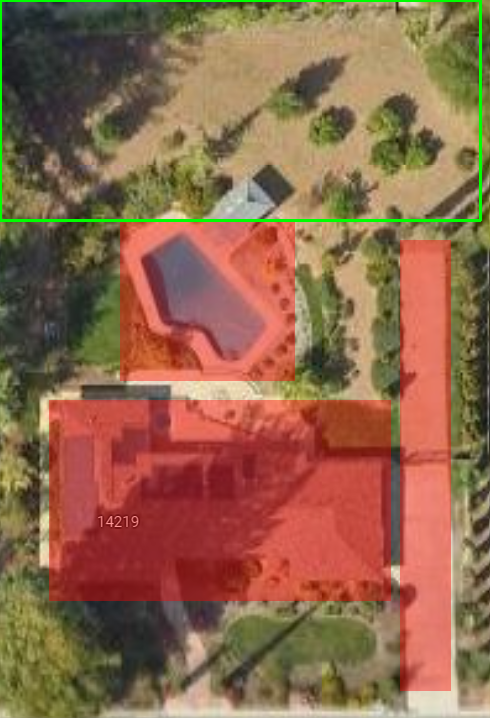

In [20]:
x = int(best['left'] * 10)
y = int(best['top'] * 10)
w = int(best['right'] * 10 - x)
h = int(best['bottom'] * 10 - y)

highlighted = original_image.copy()
cv2.rectangle(highlighted, (x, y), (x + w, y + h), (0, 255, 0), 2)
display_image(highlighted)